
Le Value at Risk (VaR) est utilisé pour mesurer la perte maximale attendue pour une entreprise sur une période donnée et un intervalle de confiance prédéfini. Supposons que le VaR quotidien d'un investissement soit de 1 million de dollars avec un intervalle de confiance de 95 %. Cela signifierait qu'il existe une probabilité de 5 % qu'un investisseur subisse une perte supérieure à 1 million de dollars en une journée.

Sur la base de cette définition, nous pouvons déterminer que les composantes du VaR sont un intervalle de confiance, une période de temps, la valeur d'un actif ou d'un portefeuille, et l'écart type, car il s'agit de risque.

En résumé, il y a quelques points importants dans l'analyse VaR qui doivent être mis en évidence :

La VaR nécessite une estimation de la probabilité de perte.
Le VaR se concentre sur les pertes potentielles. Il ne s'agit pas de pertes réelles ou réalisées ; plutôt, la VaR est une sorte de projection de perte.
Le VaR a trois ingrédients clés :
L'écart type qui définit le niveau de perte/La période de temps fixe sur laquelle le risque est évalué/Un intervalle de confiance.
La VaR peut être mesuré via trois approches différentes :
La VaR de variance-covariance/La VaR de simulation historique/La VaR de Monte Carlo.







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm
import requests
from io import StringIO
import seaborn as sns; sns.set()
import warnings
import yfinance as yf


warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

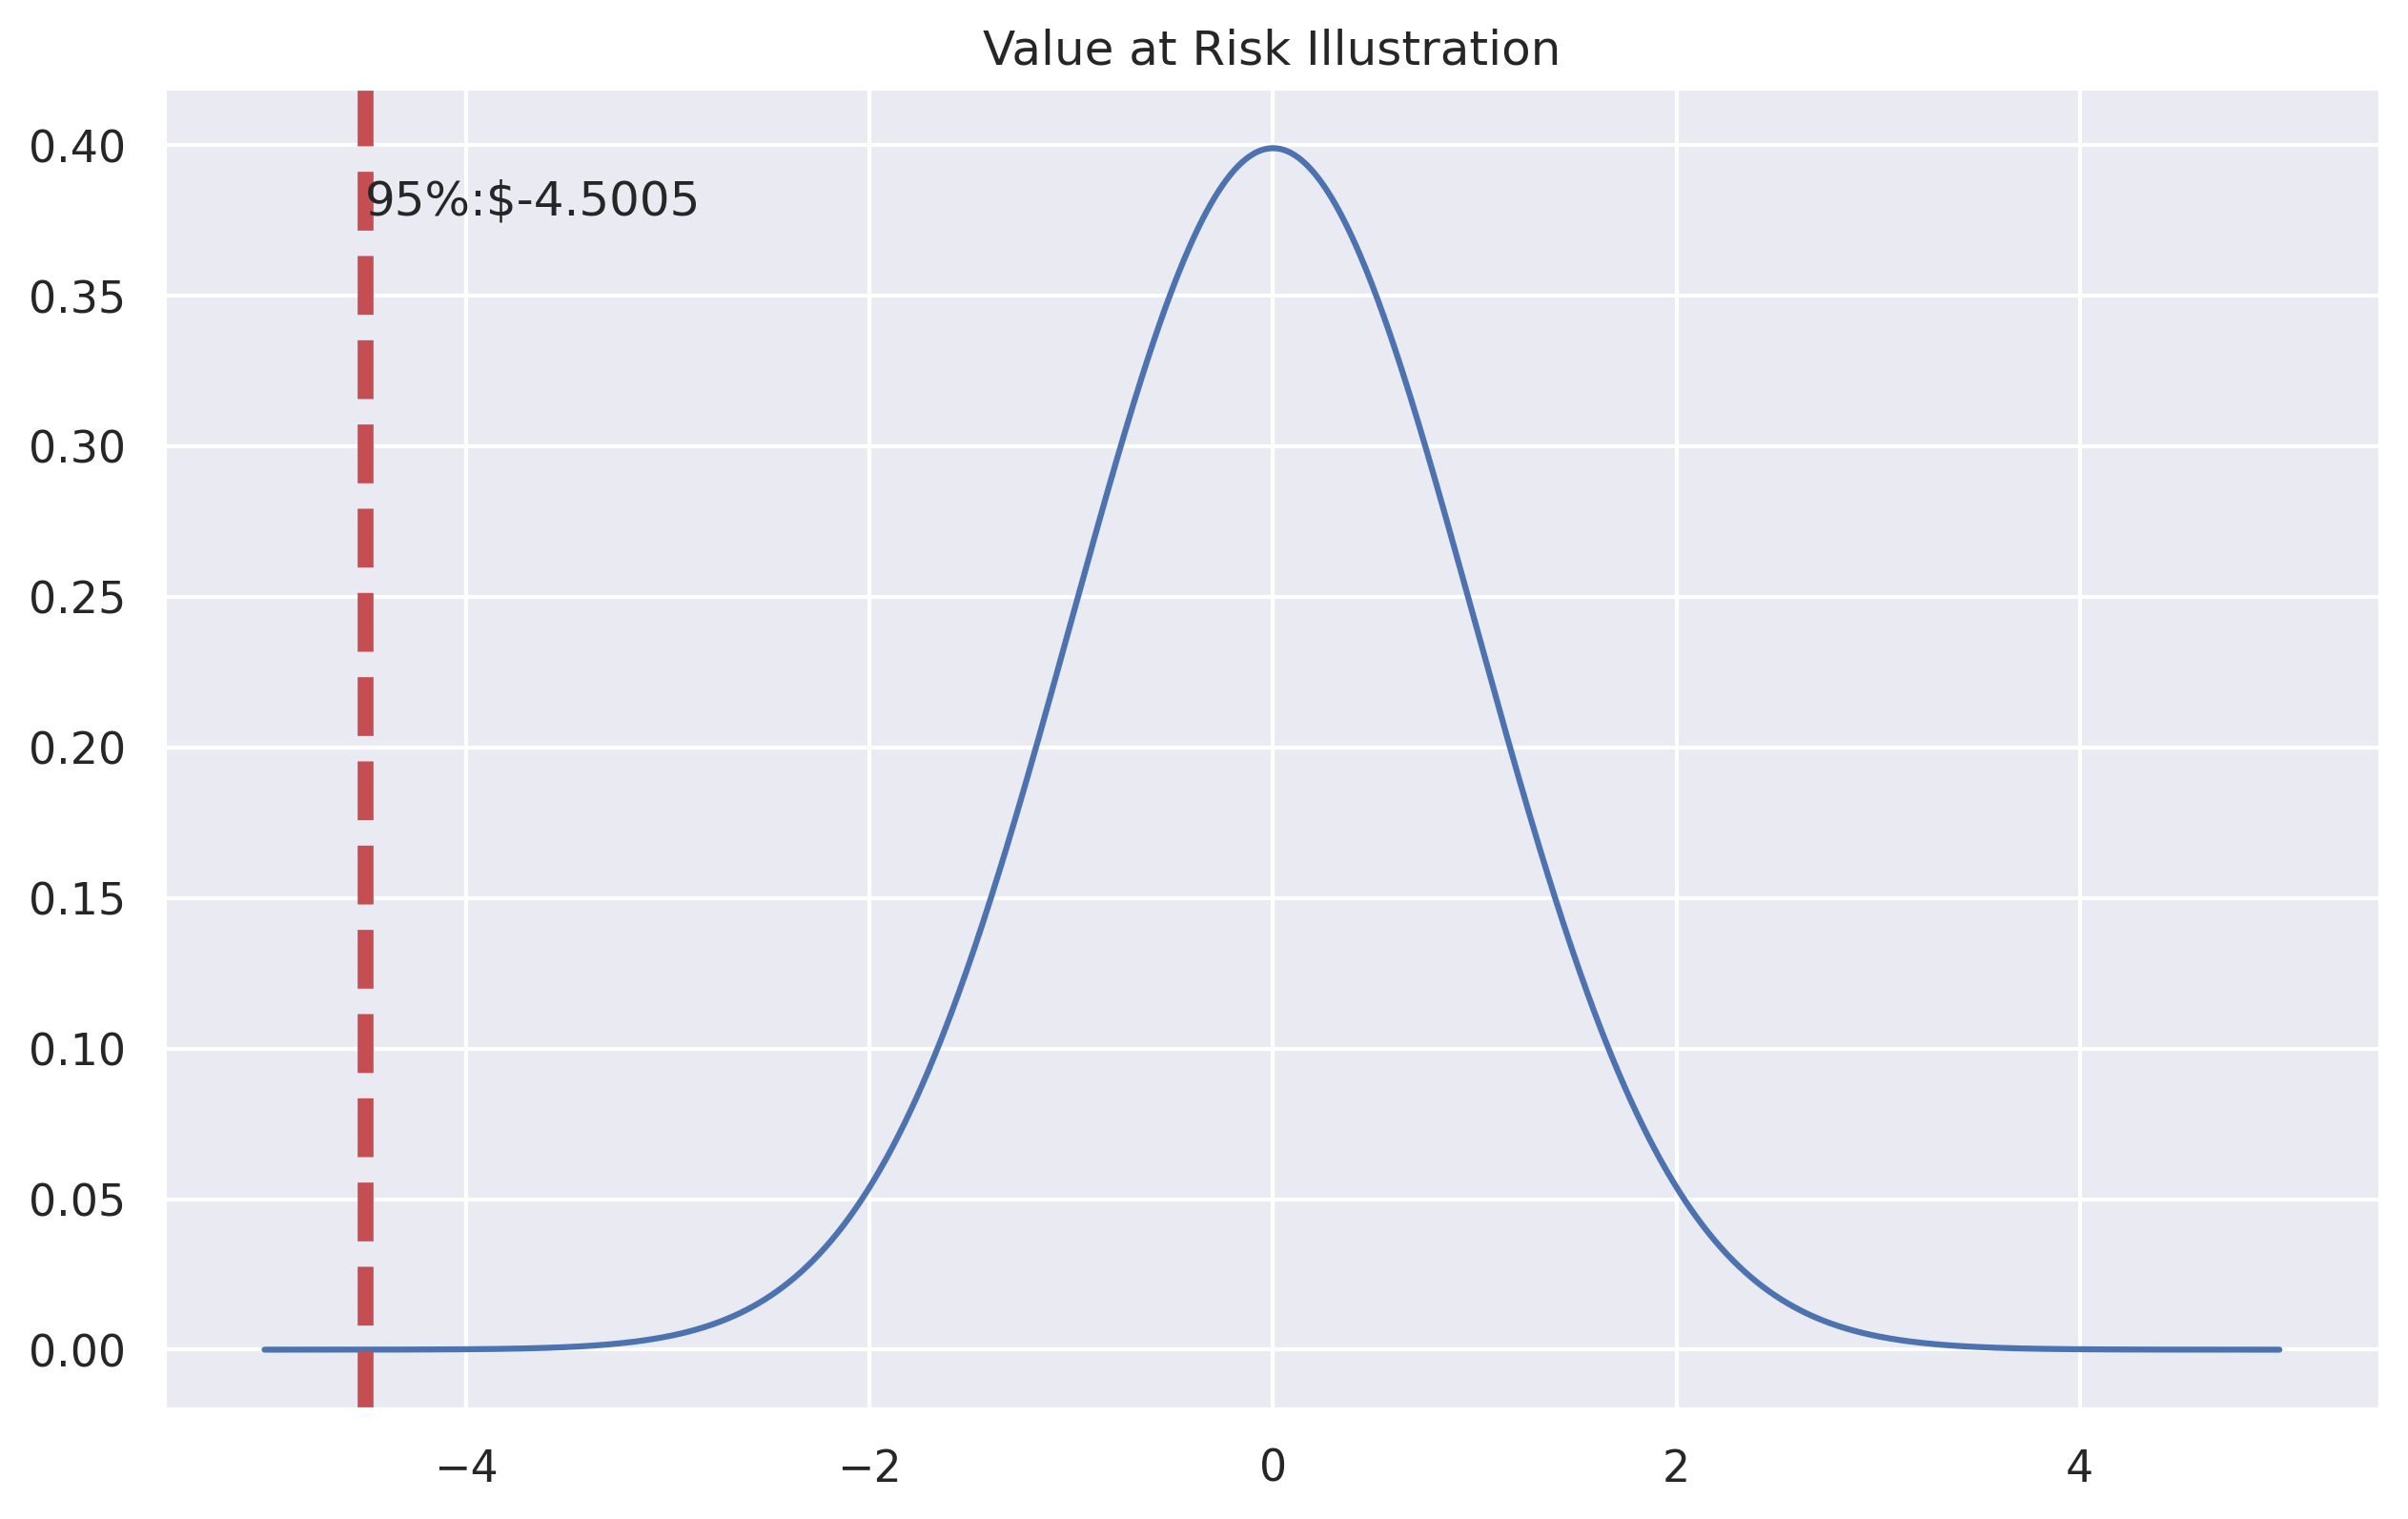

In [ ]:
mean = 0
std_dev = 1
x = np.arange(-5, 5, 0.01)
y = norm.pdf(x, mean, std_dev)
pdf = plt.plot(x, y)
min_ylim, max_ylim = plt.ylim()
plt.text(np.percentile(x, 5), max_ylim * 0.9, '95%:${:.4f}'
.format(np.percentile(x, 5)))
plt.axvline(np.percentile(x, 5), color='r', linestyle='dashed',
linewidth=4)
plt.title('Value at Risk Illustration')
plt.show()

In [ ]:
def getDailyData(symbol):
    try:
        # Fetch data from Yahoo Finance
        data = yf.download(symbol, start='2020-01-01', end='2020-12-31')
        return data
    except Exception as e:
        print("Error fetching data:", e)
        return None

In [ ]:
symbols = ["IBM", "MSFT", "INTC"]
stock3 = []
for symbol in symbols:
    data = getDailyData(symbol)
    data = data.sort_index()
    stock3.append(data['Close']['2020-01-01': '2020-12-31'])
stocks = pd.DataFrame(stock3).T
stocks.columns = symbols


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
stocks.head()

,IBM,MSFT,INTC
Date,,,
2020-01-02,129.464630,160.619995,60.840000
2020-01-03,128.432129,158.619995,60.099998
2020-01-06,128.202682,159.029999,59.930000
2020-01-07,128.288712,157.580002,58.930000
2020-01-08,129.359467,160.089996,58.970001


The Historical Simulation Method

In [ ]:
def VaR_historical(initial_investment, conf_level):
    Hist_percentile95 = []
    for i, j in zip(stocks_returns.columns, range(len(stocks_returns.columns))):
        Hist_percentile95.append(np.percentile(stocks_returns.loc[:, i], 5))
        print("Based on historical values 95% of {}'s return is {:.4f}".format(i, Hist_percentile95[j]))
        VaR_historical = (initial_investment - initial_investment * (1 + Hist_percentile95[j]))
        print("Historical VaR result for {} is {:.2f} ".format(i, VaR_historical))
        print('--' * 35)


The Monte Carlo Simulation VaR


In [ ]:
x = np.random.uniform(-1, 1, 100)
y = np.random.uniform(-1, 1, 100)

In [ ]:
sample = 100
def pi_calc(x, y):
    point_inside_circle = 0
    for i in range(sample):
      if np.sqrt(x[i] ** 2 + y[i] ** 2) <= 1:
        point_inside_circle += 1
    print('pi value is {}'.format(4 * point_inside_circle/sample))

In [ ]:
pi_calc(x,y)


pi value is 3.04


In [ ]:
x = np.random.uniform(-1, 1, 1000000)
y = np.random.uniform(-1, 1, 1000000)


In [ ]:
sample = 1000000
def pi_calc(x, y):
  point_inside_circle = 0
  for i in range(sample):
    if np.sqrt(x[i] ** 2 + y[i] ** 2) < 1:
      point_inside_circle += 1
  print('pi value is {:.2f}'.format(4 * point_inside_circle/sample))


In [ ]:
pi_calc(x,y)

pi value is 3.14


In [ ]:
sim_data = pd.DataFrame([])
num_reps = 1000
n = 100
for i in range(len(stocks.columns)):
  mean = np.random.randn(n).mean()
  std = np.random.randn(n).std()
  temp = pd.DataFrame(np.random.normal(mean, std, num_reps))
  sim_data = pd.concat([sim_data, temp], axis=1)
sim_data.columns = ['Simulation 1', 'Simulation 2', 'Simulation 3']

In [ ]:
sim_data


,Simulation 1,Simulation 2,Simulation 3
0,-0.203366,0.915037,-1.326659
1,0.637022,0.589420,-0.118342
2,-0.444113,0.434333,-1.252442
3,-1.488604,0.366658,-0.625860
4,-0.059148,0.375238,-0.148127
...,...,...,...
995,1.402045,-1.068284,-1.134419
996,-0.739432,1.381590,-1.989204
997,0.756232,2.025182,1.247382
998,-0.145715,0.095415,-0.269804


In [ ]:
def MC_VaR(initial_investment, conf_level):
  MC_percentile95 = []
  for i, j in zip(sim_data.columns, range(len(sim_data.columns))):
    MC_percentile95.append(np.percentile(sim_data.loc[:, i], 5))
    print("Based on simulation 95% of {}'s return is {:.4f}"
        .format(i, MC_percentile95[j]))
  VaR_MC = (initial_investment - initial_investment *
        (1 + MC_percentile95[j]))
  print("Simulation VaR result for {} is {:.2f} "
      .format(i, VaR_MC))
  print('--' * 35)


In [ ]:
MC_VaR(10000, 0.95)

Based on simulation 95% of Simulation 1's return is -1.4895
Based on simulation 95% of Simulation 2's return is -1.5201
Based on simulation 95% of Simulation 3's return is -1.8233
Simulation VaR result for Simulation 3 is 18232.70 
----------------------------------------------------------------------


Partie HOUTMEN


In [ ]:
def mp_pdf(sigma2, q, obs):
    lambda_plus = sigma2 * (1 + q ** 0.5) ** 2
    lambda_minus = sigma2 * (1 - q ** 0.5) ** 2
    l = np.linspace(lambda_minus, lambda_plus, obs)
    pdf_mp = 1 / (2 * np.pi * sigma2 * q * l)\
      * np.sqrt((lambda_plus - l)
      * (l - lambda_minus))
    pdf_mp = pd.Series(pdf_mp, index=l)
    return pdf_mp


In [ ]:
from sklearn.neighbors import KernelDensity

def kde_fit(bandwidth, obs, x=None):
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    if len(obs.shape) == 1:
        kde_fit = kde.fit(np.array(obs).reshape(-1, 1))

    if x is None:
        x = np.unique(obs).reshape(-1, 1)
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)

    logprob = kde_fit.score_samples(x)
    pdf_kde = pd.Series(np.exp(logprob), index=x.flatten())

    return pdf_kde


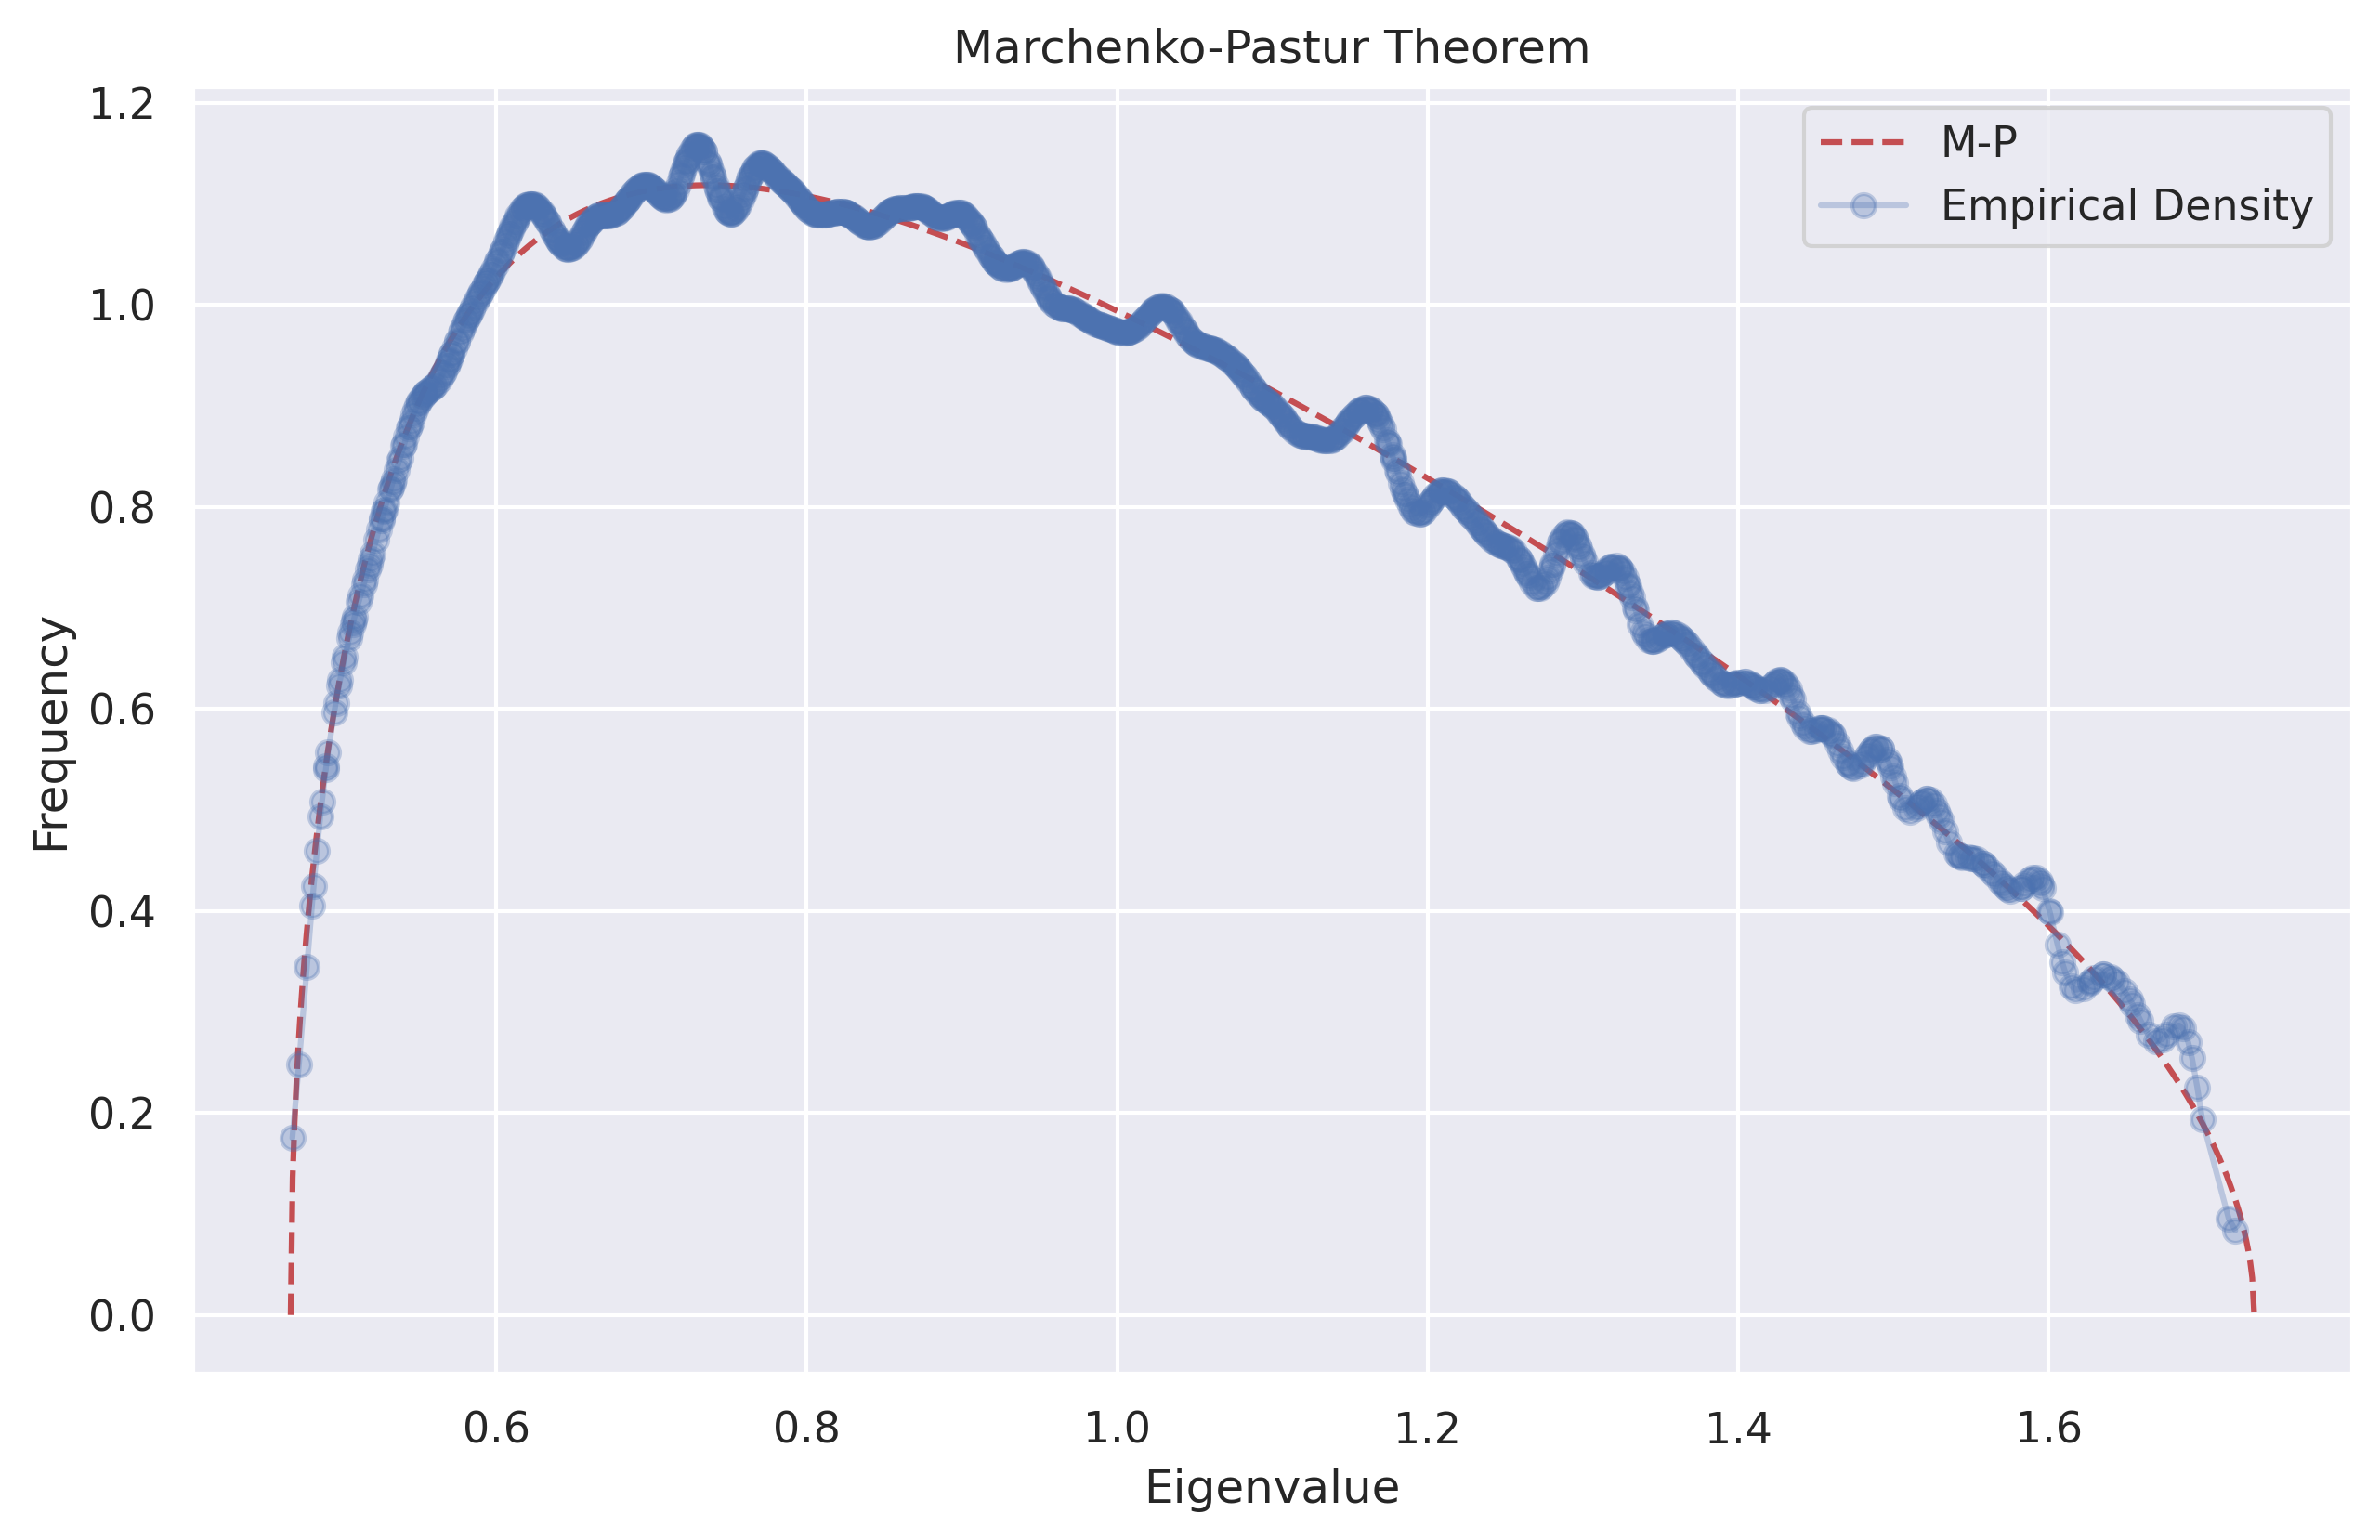

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
corr_mat = np.random.normal(size=(10000, 1000))
corr_coef = np.corrcoef(corr_mat, rowvar=0)
sigma2 = 1
obs = corr_mat.shape[0]
q = corr_mat.shape[0] / corr_mat.shape[1]


def plotting(corr_coef,q):
  ev, _ = np.linalg.eigh(corr_coef)
  idx = ev.argsort()[::-1]
  eigen_val = np.diagflat(ev[idx])
  pdf_mp = mp_pdf(1., q=corr_mat.shape[1] / corr_mat.shape[0],obs=1000)
  kde_pdf = kde_fit(0.01, np.diag(eigen_val))
  ax = pdf_mp.plot(title="Marchenko-Pastur Theorem", label="M-P", style='r--')
  kde_pdf.plot(label="Empirical Density", style='o-', alpha=0.3)
  ax.set(xlabel="Eigenvalue", ylabel="Frequency")
  ax.legend(loc="upper right")
  plt.show()
  return plt


plotting(corr_coef, q)

In [ ]:
import pandas as pd

# Définition de la matrice de covariance des rendements des actions
cov_matrix_values = [
    [0.000672, 0.000465, 0.000569],
    [0.000465, 0.000770, 0.000679],
    [0.000569, 0.000679, 0.001158]
]

# Création du DataFrame à partir des valeurs de la matrice
cov_matrix = pd.DataFrame(cov_matrix_values, columns=["IBM", "MSFT", "INTC"], index=["IBM", "MSFT", "INTC"])
# Copier les données de prix des actions
stock_prices = stocks.copy()
stocks_returns = (np.log(stocks) - np.log(stocks.shift(1))).dropna()
risk_estimators = stocks_returns.std()
# Calculer la matrice de covariance des rendements des actions
cov_matrix = stocks_returns.cov()
print("Matrice de covariance des rendements des actions :")
print(cov_matrix)


Matrice de covariance des rendements des actions :
           IBM      MSFT      INTC
IBM   0.000674  0.000467  0.000570
MSFT  0.000467  0.000773  0.000681
INTC  0.000570  0.000681  0.001161


Matrice de débruitage


In [ ]:
import pandas as pd
import numpy as np

# Supposons que vous ayez déjà défini 'cov_matrix', 'n_relation' et 'kde_bwidth'
# Par exemple, 'cov_matrix' est la matrice de covariance précédemment calculée

# Débruitage de la matrice de covariance avec une moyenne mobile exponentielle
def denoise_covariance(cov_matrix, window):
    return cov_matrix.ewm(span=window, min_periods=0, adjust=True).mean()

# Fenêtre de la moyenne mobile exponentielle
window = 5

# Utilisation de la fonction de débruitage pour débruitage de la matrice de covariance
cov_matrix_denoised = denoise_covariance(cov_matrix, window)

# Conversion de la matrice de covariance débruitée en DataFrame avec les mêmes index et colonnes que la matrice originale
cov_matrix_denoised = pd.DataFrame(cov_matrix_denoised, index=cov_matrix.index, columns=cov_matrix.columns)
print("Matrice de covariance débruite :")
print(cov_matrix_denoised)


Matrice de covariance débruite :
           IBM      MSFT      INTC
IBM   0.000674  0.000467  0.000570
MSFT  0.000550  0.000651  0.000637
INTC  0.000560  0.000665  0.000885


In [ ]:
import numpy as np
from scipy.stats import norm

def VaR_parametric_denoised(initial_investment, conf_level, weights, cov_matrix_denoised, stocks_returns_mean, stocks):
    port_std = np.sqrt(weights.T.dot(cov_matrix_denoised).dot(weights))
    alpha = norm.ppf(1 - conf_level, stocks_returns_mean, port_std)
    VaR_params = (initial_investment - initial_investment * (1 + alpha))
    for i, j in zip(stocks.columns, range(len(stocks.columns))):
        print("Parametric VaR result for {} is {} ".format(i, VaR_params))
    print('--' * 25)
    return VaR_params


In [ ]:
import numpy as np
from scipy.stats import norm

# Définition des paramètres fictifs
initial_investment = 1000000  # Investissement initial
conf_level = 0.95  # Niveau de confiance
weights = np.array([0.3, 0.4, 0.3])  # Poids des actions
stocks_columns = ["IBM", "MSFT", "INTC"]  # Noms des colonnes d'actions
stocks_returns_mean = 0.05  # Rendement moyen des actions (pour la distribution normale)

# Supposons que vous ayez déjà défini cov_matrix_denoised

# Définition de la fonction VaR_parametric_denoised
def VaR_parametric_denoised(initial_investment, conf_level):
    port_std = np.sqrt(weights.T.dot(cov_matrix_denoised).dot(weights))
    alpha = norm.ppf(1 - conf_level, stocks_returns_mean, port_std)
    VaR_params = (initial_investment - initial_investment * (1 + alpha))
    for i, j in zip(stocks_columns, range(len(stocks_columns))):
        print("Parametric VaR result for {} is {} ".format(i, VaR_params))
    print('--' * 25)
    return VaR_params

# Exécution de la fonction avec les paramètres définis
VaR_parametric_denoised(initial_investment, conf_level)


Parametric VaR result for IBM is -8896.202639152762 
Parametric VaR result for MSFT is -8896.202639152762 
Parametric VaR result for INTC is -8896.202639152762 
--------------------------------------------------


-8896.202639152762

In [ ]:
import pandas as pd
import yfinance as yf

def getDailyData(symbol):
    try:
        # Récupérer les données depuis Yahoo Finance
        data = yf.download(symbol, start='2007-04-01', end='2009-02-01')
        return data
    except Exception as e:
        print("Erreur lors de la récupération des données :", e)
        return None

symbols = ["IBM", "MSFT", "INTC"]
stock3 = []

for symbol in symbols:
    data = getDailyData(symbol)
    data = data.sort_index()
    stock3.append(data['Close']['2007-04-01': '2009-02-01'])

# Création du DataFrame stocks_crisis
stocks_crisis = pd.DataFrame(stock3).T
stocks_crisis.columns = symbols

print(stocks_crisis)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  IBM       MSFT       INTC
Date                                       
2007-04-02  91.022942  27.740000  19.129999
2007-04-03  91.873802  27.870001  19.309999
2007-04-04  91.978966  28.500000  19.379999
2007-04-05  92.275337  28.549999  19.580000
2007-04-09  92.370934  28.570000  20.100000
...               ...        ...        ...
2009-01-26  87.571701  17.629999  13.380000
2009-01-27  87.629066  17.660000  13.810000
2009-01-28  90.650093  18.040001  14.010000
2009-01-29  88.441681  17.590000  13.370000
2009-01-30  87.619499  17.100000  12.900000

[463 rows x 3 columns]


In [ ]:
import numpy as np

# Supposons que vous ayez déjà défini 'stocks_crisis', 'initial_investment' et 'conf_level'

# Copier les données des prix des actions
stock_prices = stocks_crisis.copy()



# Calculer la matrice de covariance des rendements des actions
cov_matrix = stocks_returns.cov()

# Définition de la fonction VaR_parametric
def VaR_parametric(initial_investment, conf_level):
    port_std = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
    alpha = norm.ppf(1 - conf_level, 0, 1)
    VaR_param = initial_investment * (1 - np.exp(stocks_returns_mean - port_std * alpha))
    return VaR_param

# Appel de la fonction VaR_parametric avec les paramètres spécifiés
initial_investment = 1000000  # Exemple d'investissement initial
conf_level = 0.95  # Exemple de niveau de confiance
VaR_result = VaR_parametric(initial_investment, conf_level)

print("Parametric VaR result is:", VaR_result)

import numpy as np
from scipy.stats import norm

# Fonction pour calculer la VAR paramétrique débruitée avec les mêmes paramètres qu'avant
def VaR_parametric_denoised(initial_investment, conf_level, cov_matrix_denoised):
    port_std = np.sqrt(weights.T.dot(cov_matrix_denoised).dot(weights))
    alpha = norm.ppf(1 - conf_level, 0, 1)
    VaR_param = initial_investment * (1 - np.exp(stocks_returns_mean - port_std * alpha))
    return VaR_param

# Utilisation de la fonction pour calculer la VAR paramétrique débruitée avec les mêmes paramètres qu'avant
VaR_result_denoised = VaR_parametric_denoised(initial_investment, conf_level, cov_matrix_denoised)

print("La VAR paramétrique débruitée avec les mêmes paramètres qu'avant est:", VaR_result_denoised)


Parametric VaR result is: -96896.82700818691
La VAR paramétrique débruitée avec les mêmes paramètres qu'avant est: -95382.69719098812


In [ ]:
stocks_returns_mean = stocks_returns.mean()
weights  = np.random.random(len(stocks_returns.columns))
weights /= np.sum(weights)
cov_var = stocks_returns.cov()
port_std = np.sqrt(weights.T.dot(cov_var).dot(weights))

# Expected Shortfall

In [ ]:
initial_investment = 1e6
conf_level = 0.95

In [ ]:
stocks_returns = (np.log(stocks) - np.log(stocks.shift(1))).dropna()

In [ ]:
stocks_returns_mean = stocks_returns.mean()
weights  = np.random.random(len(stocks_returns.columns))
weights /= np.sum(weights)
cov_var = stocks_returns.cov()
port_std = np.sqrt(weights.T.dot(cov_var).dot(weights))

In [ ]:
def ES_parametric(initial_investment , conf_level):
  alpha = - norm.ppf(1 - conf_level,stocks_returns_mean,port_std)
  for i, j in zip(stocks.columns, range(len(stocks.columns))):
    VaR_param = (initial_investment * alpha)[j]
    ES_param = (1 / (1 - conf_level)) * norm.expect(lambda x: x,lb = norm.ppf(conf_level, stocks_returns_mean[j],port_std),loc = stocks_returns_mean[j],scale = port_std)
    print(f"Parametric ES result for {i} is {ES_param}")

print(ES_parametric(initial_investment , conf_level))

Parametric ES result for IBM is 0.05270860911531027
Parametric ES result for MSFT is 0.05433233377380034
Parametric ES result for INTC is 0.052166055512406564
None


In [ ]:
def ES_historical(initial_investment, conf_level):
  for i, j in zip(stocks_returns.columns,range(len(stocks_returns.columns))):
    ES_hist_percentile95 = np.percentile(stocks_returns.loc[:, i],5)
    ES_historical = stocks_returns[str(i)][stocks_returns[str(i)] <=ES_hist_percentile95].mean()
    ES = np.mean(ES_historical)
    print("Historical ES result for {} is {:.4f} ".format(i, initial_investment * ES_historical))
    print("Historical ES_percentile95 result for {} is {:.4f} ".format(i, ES_hist_percentile95))
    print("Historical Expected_shortfall  result for {} is {:.4f} ".format(i, ES))


ES_historical(initial_investment, conf_level)

Historical ES result for IBM is -64802.3835 
Historical ES_percentile95 result for IBM is -0.0372 
Historical Expected_shortfall  result for IBM is -0.0648 
Historical ES result for MSFT is -65765.0990 
Historical ES_percentile95 result for MSFT is -0.0426 
Historical Expected_shortfall  result for MSFT is -0.0658 
Historical ES result for INTC is -88462.7462 
Historical ES_percentile95 result for INTC is -0.0425 
Historical Expected_shortfall  result for INTC is -0.0885 


Expected Shortfall (95% confidence): -0.03738252883887727


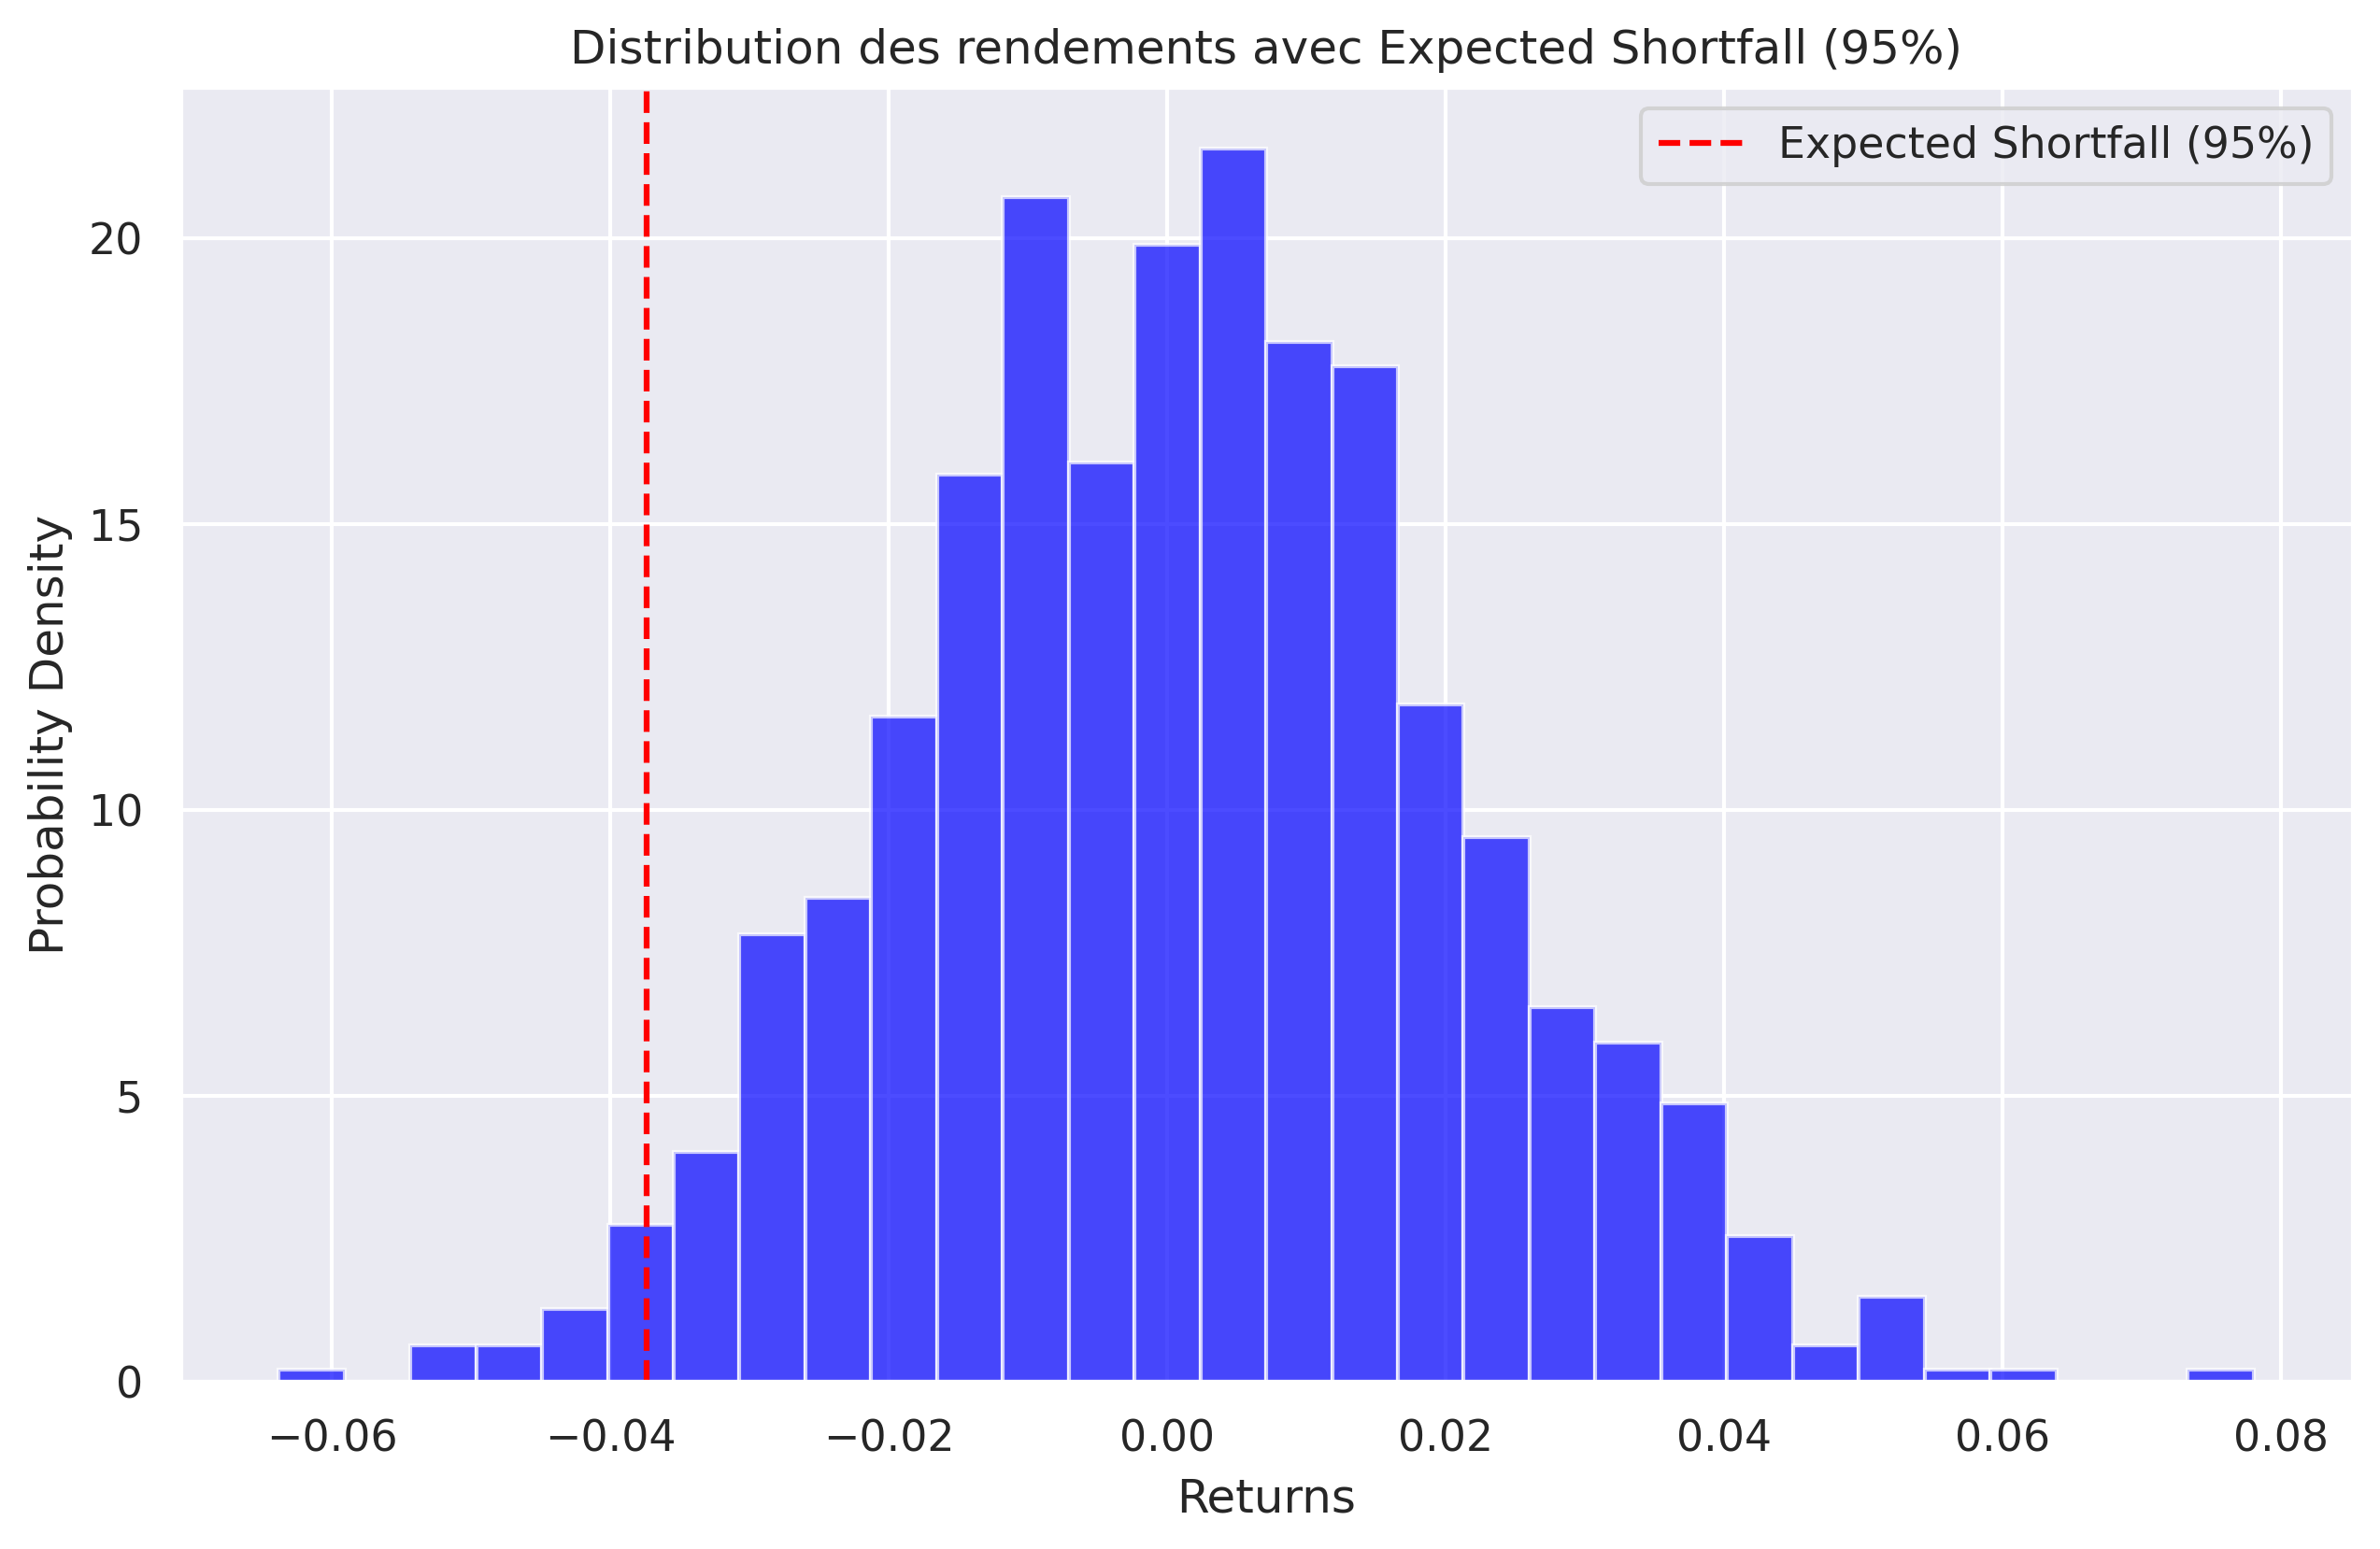

In [ ]:
def expected_shortfall(returns, alpha=0.05):
    """
    Calcule l'Expected Shortfall (CVaR) pour un niveau de confiance donné.

    Parameters:
    returns (array_like): Une série de rendements.
    alpha (float): Niveau de confiance, par défaut 0.05 pour 95% de confiance.

    Returns:
    float: Expected Shortfall (CVaR) pour le niveau de confiance spécifié.
    """
    sorted_returns = np.sort(returns)
    VaR_index = int(alpha * len(sorted_returns))
    VaR = sorted_returns[VaR_index]
    ES = np.mean(sorted_returns[:VaR_index+1])
    return ES

# Générer des rendements aléatoires pour l'exemple
np.random.seed(42)
returns = np.random.normal(loc=0.001, scale=0.02, size=1000)

# Calculer l'Expected Shortfall pour un niveau de confiance de 95%
ES_95 = expected_shortfall(returns)
print("Expected Shortfall (95% confidence):", ES_95)

# Visualisation des rendements et du VaR
plt.hist(returns, bins=30, density=True, alpha=0.7, color='blue')
plt.axvline(x=ES_95, color='red', linestyle='--', label='Expected Shortfall (95%)')
plt.legend()
plt.xlabel('Returns')
plt.ylabel('Probability Density')
plt.title('Distribution des rendements avec Expected Shortfall (95%)')
plt.show()

## 5 Effective Cost


In [ ]:
stocks_returns_mean = stocks_returns.mean()
weights  = np.random.random(len(stocks_returns.columns))
weights /= np.sum(weights)
cov_var = stocks_returns.cov()
port_std = np.sqrt(weights.T.dot(cov_var).dot(weights))

In [ ]:
bid_ask = pd.read_csv('bid_ask.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'bid_ask.csv'

In [ ]:
bid_ask['mid_price'] = (bid_ask['ASKHI'] + bid_ask['BIDLO']) / 2
buyer_seller_initiated = []
for i in range(len(bid_ask)):
    if bid_ask['PRC'][i] > bid_ask['mid_price'][i]:
        buyer_seller_initiated.append(1)
    else:
        buyer_seller_initiated.append(0)

bid_ask['buyer_seller_init'] = buyer_seller_initiated

In [ ]:
effective_cost = []
for i in range(len(bid_ask)):
    if bid_ask['buyer_seller_init'][i] == 1:
        effective_cost.append((bid_ask['PRC'][i] -
                               bid_ask['mid_price'][i]) /
                               bid_ask['mid_price'][i])
    else:
        effective_cost.append((bid_ask['mid_price'][i] -
                               bid_ask['PRC'][i])/
                               bid_ask['mid_price'][i])
bid_ask['effective_cost'] = effective_cost

In [ ]:
bid_ask['quoted'] = bid_ask['ASKHI'] - bid_ask['BIDLO']
bid_ask['prop_quoted'] = (bid_ask['ASKHI'] - bid_ask['BIDLO']) /\
                         bid_ask['mid_price']
bid_ask['effective'] = 2 * abs(bid_ask['PRC'] - bid_ask['mid_price'])
bid_ask['prop_effective'] = 2 * abs(bid_ask['PRC'] -
                                    bid_ask['mid_price']) /\
                                    bid_ask['PRC']

In [ ]:
spread_meas = bid_ask.iloc[:, -5:]
spread_meas.corr()

In [ ]:
spread_meas.describe()

In [ ]:
high_corr = spread_meas.corr().unstack()\
            .sort_values(ascending=False).drop_duplicates()
high_corr[(high_corr > 0.80) & (high_corr != 1)]

In [ ]:
sorted_spread_measures = bid_ask.iloc[:, -5:-2]

In [ ]:
cross_sec_mean_corr = sorted_spread_measures.mean(axis=1).mean()
std_corr = sorted_spread_measures.std().sum() / 3

In [ ]:
df = pd.DataFrame(index=stocks.columns)
last_prices = []
for i in symbols:
    last_prices.append(stocks[i].iloc[-1])
df['last_prices'] = last_prices

In [ ]:
def ES_parametric(initial_investment, conf_level):
    ES_params = [ ]
    alpha = - norm.ppf(1 - conf_level, stocks_returns_mean, port_std)
    for i,j in zip(stocks.columns,range(len(stocks.columns))):
        VaR_param = (initial_investment * alpha)[j]
        ES_param = (1 / (1 - conf_level)) \
                   * norm.expect(lambda x: VaR_param, lb = conf_level)
        ES_params.append(ES_param)
    return ES_params

In [ ]:
ES_params = ES_parametric(initial_investment, conf_level)
for i in range(len(symbols)):
    print(f'The ES result for {symbols[i]} is {ES_params[i]}')

In [ ]:
k = 1.96

for i, j in zip(range(len(symbols)), symbols):
    print('The liquidity Adjusted ES of {} is {}'
          .format(j, ES_params[i] + (df.loc[j].values[0] / 2) *
                  (cross_sec_mean_corr + k * std_corr)))

PCA for effective cost

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
spread_meas_scaled = scaler.fit_transform(np.abs(spread_meas))
pca = PCA(n_components=5)
prin_comp = pca.fit_transform(spread_meas_scaled)

In [ ]:
var_expl = np.round(pca.explained_variance_ratio_, decimals=4)
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_,
                             decimals=4))
print('Individually Explained Variances are:\n{}'.format(var_expl))
print('=='*30)
print('Cumulative Explained Variances are: {}'.format(cum_var))

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

In [ ]:
pca = PCA(n_components=2)
pca.fit(np.abs(spread_meas_scaled))
prin_comp = pca.transform(np.abs(spread_meas_scaled))
prin_comp = pd.DataFrame(np.abs(prin_comp), columns = ['Component 1',
                                                       'Component 2'])
print(pca.explained_variance_ratio_*100)

In [ ]:
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex * 4, ys * scaley * 4, s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'r',
                  alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0], coeff[i, 1], "Var"+str(i),
                     color='black')
        else:
            plt.text(coeff[i,0 ], coeff[i, 1], labels[i],
                     color='black')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [ ]:
spread_measures_scaled_df = pd.DataFrame(spread_meas_scaled,
                                         columns=spread_meas.columns)

In [ ]:
myplot(np.array(spread_measures_scaled_df)[:, 0:2],
       np.transpose(pca.components_[0:2,:]),
       list(spread_measures_scaled_df.columns))
plt.show()

In [ ]:
prin_comp1_rescaled = prin_comp.iloc[:,0] * prin_comp.iloc[:,0].std()\
                      + prin_comp.iloc[:, 0].mean()
prin_comp2_rescaled = prin_comp.iloc[:,1] * prin_comp.iloc[:,1].std()\
                      + prin_comp.iloc[:, 1].mean()
prin_comp_rescaled = pd.concat([prin_comp1_rescaled,
                                prin_comp2_rescaled],
                               axis=1)
prin_comp_rescaled.head()

In [ ]:
mean_pca_liq = prin_comp_rescaled.mean(axis=1).mean()
mean_pca_liq

In [ ]:
k = 1.96
for i, j in zip(range(len(symbols)), symbols):
    print('The liquidity Adjusted ES of {} is {}'
          .format(j, ES_params[i] + (df.loc[j].values[0] / 2) *
                  (mean_pca_liq + k * std_corr)))

Fetch data

In [ ]:
# Define the ticker symbol
ticker_symbol = "AAPL"  # Example: Apple Inc.

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Get the bid and ask prices
bid_price = ticker.info['bid']
ask_price = ticker.info['ask']

# Calculate the bid-ask spread
bid_ask_spread = ask_price - bid_price

print("Bid Price:", bid_price)
print("Ask Price:", ask_price)
print("Bid-Ask Spread:", bid_ask_spread)

In [ ]:

# Define the ticker symbol
ticker_symbol = 'AAPL'

# Fetch historical data with a 30-minute interval
data = yf.download(ticker_symbol, interval='30m', period='1d')

# Print the data
print(data)

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import time

def fetch_data(ticker_symbol, duration_minutes):
    """
    Fetch bid and ask prices for a given ticker symbol for a specified duration from the current time.
    """
    # Create an empty DataFrame to store the data
    data = pd.DataFrame(columns=['Date', 'Ticker', 'Bid', 'Ask'])

    # Iterate through each minute within the specified duration
    current_date = datetime.now()
    end_date = current_date + timedelta(minutes=duration_minutes)
    while current_date <= end_date:
        try:
            # Fetch bid and ask prices
            ticker = yf.Ticker(ticker_symbol)
            ticker_info = ticker.info
            bid_price = ticker_info['bid']
            ask_price = ticker_info['ask']

            # Append data to DataFrame
            data = data.append({'Date': current_date, 'Ticker': ticker_symbol, 'Bid': bid_price, 'Ask': ask_price}, ignore_index=True)

            print("Fetched data for:", current_date)
        except Exception as e:
            print("Error fetching data:", e)

        # Increment current date by 1 minute
        current_date += timedelta(minutes=1)

        # Fetch data every minute
        time.sleep(60)

    return data

# Define parameters
ticker_symbol = 'AAPL'  # Example ticker symbol
duration_minutes = 5  # Example duration in minutes

# Fetch data
data = fetch_data(ticker_symbol, duration_minutes)


